# Exercise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Part 1
Simulate 10,000 samples and compare histograms with analytical PDFs.
Perform KS test for each.

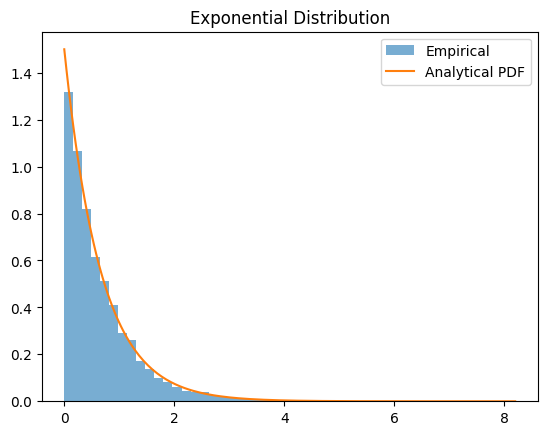

Exp KS test: KstestResult(statistic=np.float64(0.008679647461751427), pvalue=np.float64(0.4360031101209473), statistic_location=np.float64(1.3018507558955503), statistic_sign=np.int8(1))


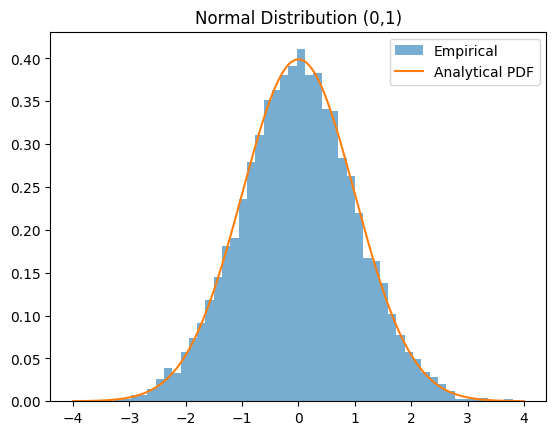

Normal KS test: KstestResult(statistic=np.float64(0.005284517113040232), pvalue=np.float64(0.9413743291019969), statistic_location=np.float64(1.2964195921045305), statistic_sign=np.int8(-1))


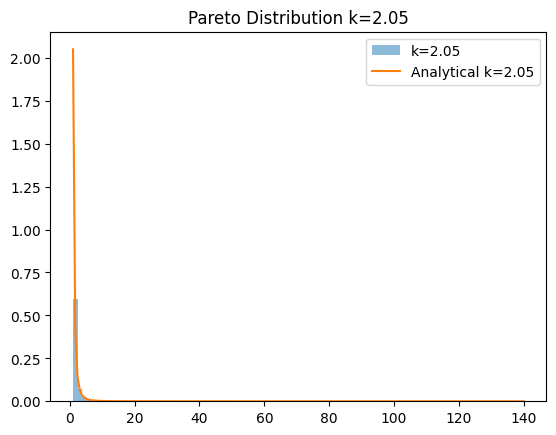

Pareto k=2.05 KS test: KstestResult(statistic=np.float64(0.006320797650519516), pvalue=np.float64(0.8167188108951772), statistic_location=np.float64(1.2897282328990562), statistic_sign=np.int8(-1))


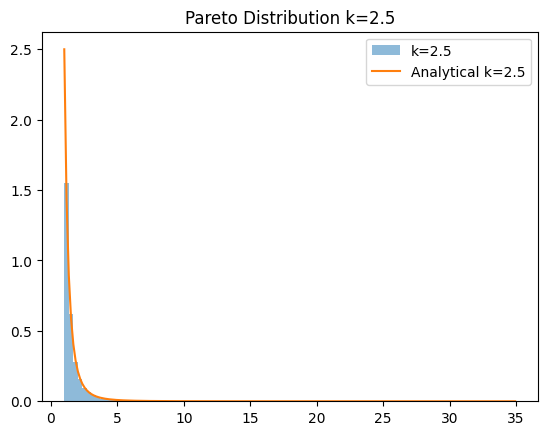

Pareto k=2.5 KS test: KstestResult(statistic=np.float64(0.014856528543237713), pvalue=np.float64(0.023963942127939473), statistic_location=np.float64(1.2030280888420692), statistic_sign=np.int8(1))


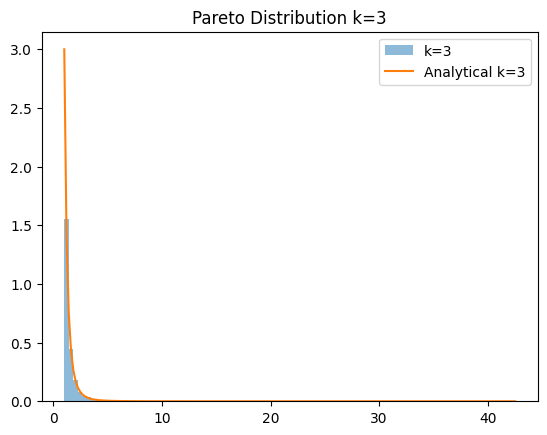

Pareto k=3 KS test: KstestResult(statistic=np.float64(0.007584775302396207), pvalue=np.float64(0.6101302929197331), statistic_location=np.float64(1.893008455144018), statistic_sign=np.int8(-1))


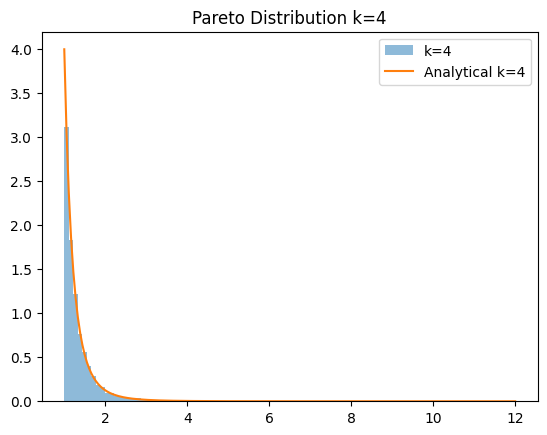

Pareto k=4 KS test: KstestResult(statistic=np.float64(0.005054246677738905), pvalue=np.float64(0.9592363663272458), statistic_location=np.float64(1.4355796209847942), statistic_sign=np.int8(-1))


In [2]:
# (a) Exponential
n = 10000
rate = 1.5
exp_samples = np.random.exponential(1/rate, size=n)
# Plot histogram and PDF
plt.hist(exp_samples, bins=50, density=True, alpha=0.6, label='Empirical')
x = np.linspace(0, exp_samples.max(), 200)
plt.plot(x, rate*np.exp(-rate*x), label='Analytical PDF')
plt.title('Exponential Distribution')
plt.legend(); plt.show()
# KS test
ks_exp = stats.kstest(exp_samples, 'expon', args=(0, 1/rate))
print('Exp KS test:', ks_exp)

# (b) Normal via Box-Muller
u1 = np.random.rand(n//2)
u2 = np.random.rand(n//2)
z1 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)
norm_samples = np.concatenate([z1, z2])
plt.hist(norm_samples, bins=50, density=True, alpha=0.6, label='Empirical')
x = np.linspace(-4, 4, 200)
plt.plot(x, stats.norm.pdf(x), label='Analytical PDF')
plt.title('Normal Distribution (0,1)')
plt.legend(); plt.show()
ks_norm = stats.kstest(norm_samples, 'norm')
print('Normal KS test:', ks_norm)

# (c) Pareto with beta=1
beta = 1
for k in [2.05, 2.5, 3, 4]:
    pareto_samples = beta * (1 + np.random.pareto(k, size=n))
    plt.hist(pareto_samples, bins=100, density=True, alpha=0.5, label=f'k={k}')
    x = np.linspace(beta, pareto_samples.max(), 200)
    pdf = (k * beta**k) / x**(k+1)
    plt.plot(x, pdf, label=f'Analytical k={k}')
    plt.title(f'Pareto Distribution k={k}')
    plt.legend(); plt.show()
    ks_p = stats.kstest(pareto_samples, 'pareto', args=(k, 0, beta))
    print(f'Pareto k={k} KS test:', ks_p)


## Part 2
Compare sample vs analytical for k>1 (mean) and k>2 (variance).

In [3]:
beta = 1
for k in [2.05, 2.5, 3, 4]:
    samples = beta * (1 + np.random.pareto(k, size=n))
    sample_mean = samples.mean()
    sample_var = samples.var(ddof=1)
    anal_mean = beta * k / (k - 1)
    anal_var = beta**2 * k / ((k-1)**2 * (k-2)) if k > 2 else np.nan
    print(f'k={k}: sample mean={sample_mean:.3f}, analytical mean={anal_mean:.3f} |'
          f' sample var={sample_var:.3f}, analytical var={anal_var:.3f}')

k=2.05: sample mean=1.908, analytical mean=1.952 | sample var=4.065, analytical var=37.188
k=2.5: sample mean=1.668, analytical mean=1.667 | sample var=1.665, analytical var=2.222
k=3: sample mean=1.520, analytical mean=1.500 | sample var=0.801, analytical var=0.750
k=4: sample mean=1.329, analytical mean=1.333 | sample var=0.225, analytical var=0.222


## Part 3
Generate 100 intervals using n=10 observations each.

In [4]:
m = 100
n_obs = 10
true_mean = 0
true_var = 1
mean_cover = 0
var_cover = 0
for _ in range(m):
    data = np.random.randn(n_obs)
    # mean CI
    s = data.std(ddof=1)
    t_val = stats.t.ppf(0.975, df=n_obs-1)
    ci_mean = (data.mean() - t_val*s/np.sqrt(n_obs), data.mean() + t_val*s/np.sqrt(n_obs))
    mean_cover += ci_mean[0] <= true_mean <= ci_mean[1]
    # variance CI
    chi2_low = stats.chi2.ppf(0.025, df=n_obs-1)
    chi2_high = stats.chi2.ppf(0.975, df=n_obs-1)
    ci_var = ((n_obs-1)*s**2/chi2_high, (n_obs-1)*s**2/chi2_low)
    var_cover += ci_var[0] <= true_var <= ci_var[1]
print(f'Mean CI coverage: {mean_cover/m:.2f}, Variance CI coverage: {var_cover/m:.2f}')

Mean CI coverage: 0.97, Variance CI coverage: 0.96


## Part 4
Use U~Uniform(0,1), X = beta*(1-U)^(-1/k).

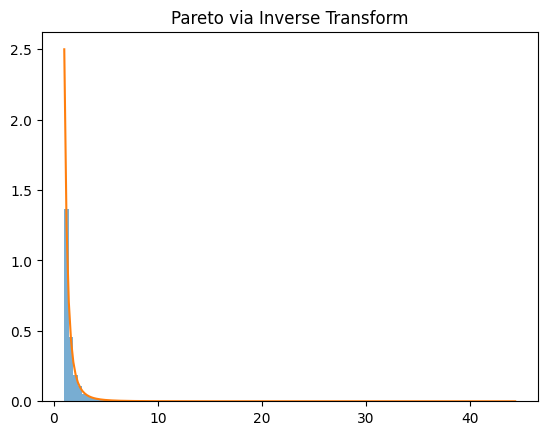

Inverse Pareto KS test: KstestResult(statistic=np.float64(0.006016815144597065), pvalue=np.float64(0.8598325997931853), statistic_location=np.float64(2.2617527677951683), statistic_sign=np.int8(-1))


In [5]:
beta = 1
k = 2.5
U = np.random.rand(n)
X_inv = beta*(1 - U)**(-1/k)
plt.hist(X_inv, bins=100, density=True, alpha=0.6)
x = np.linspace(beta, X_inv.max(), 200)
pdf = (k*beta**k)/x**(k+1)
plt.plot(x, pdf)
plt.title('Pareto via Inverse Transform')
plt.show()
# KS test
ks_inv = stats.kstest(X_inv, 'pareto', args=(k, 0, beta))
print('Inverse Pareto KS test:', ks_inv)